In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [ ]:
dems = glob.glob('*.tif')

In [ ]:
src_files_to_mosaic = []
for fp in dems:
    src =rasterio.open(fp)
    src_files_to_mosaic.append(src)
mosaic, out_trans = merge(src_files_to_mosaic)

In [ ]:
show(mosaic, cmap='jet')

In [ ]:
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff","height": mosaic.shape[1],"width": mosaic.shape[2],
                 "transform": out_trans,"crs": "+proj=utm +zone=13 +ellps=GRS80 +units=m +no_defs "})

In [ ]:
with rasterio.open('merged.tif', "w", **out_meta) as dest:
    dest.write(mosaic)

In [2]:
merged = r'merged.tif'

In [3]:
with rasterio.open(merged) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    elevation[elevation < 0] = np.nan
rastered = rasterio.open(merged)

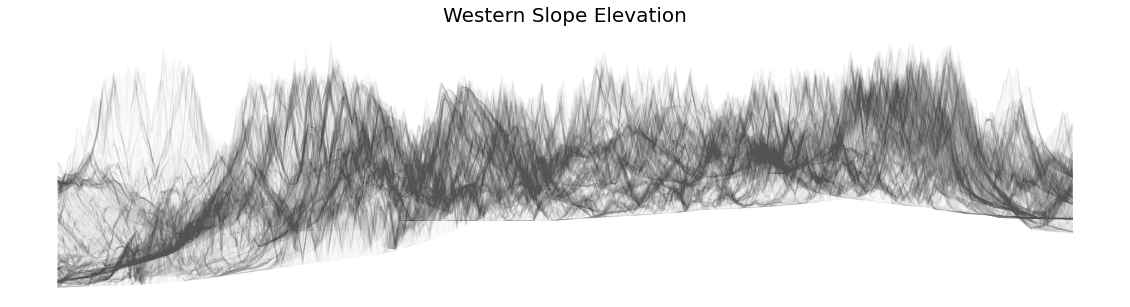

In [4]:
plt.figure(figsize=(20,5))
for i in range(0,elevation.shape[0],5):
    plt.plot(elevation[i], c='k', alpha=0.01)
plt.axis('off')
plt.title('Western Slope Elevation', fontsize=20)
plt.savefig('Day_21.png')